In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
import gdown
!gdown --fuzzy https://docs.google.com/spreadsheets/d/1HkEsQpWmbdVyOoD1eO92o-1UMu5TiTDr/edit?usp=sharing&ouid=101427335017282841206&rtpof=true&sd=true

Downloading...
From: https://drive.google.com/uc?id=1HkEsQpWmbdVyOoD1eO92o-1UMu5TiTDr
To: /content/Supply chain logisitcs problem.xlsx
100% 795k/795k [00:00<00:00, 10.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mainFile = pd.ExcelFile("/content/Supply chain logisitcs problem.xlsx")

In [ ]:
df_dict = {}

for names in mainFile.sheet_names:
    globals()[names] = mainFile.parse(names)
    df_dict[names] = globals()[names]
# show all table names
df_dict.keys()

dict_keys(['OrderList', 'FreightRates', 'WhCosts', 'WhCapacities', 'ProductsPerPlant', 'VmiCustomers', 'PlantPorts'])

In [ ]:
for df_name, df in df_dict.items():
    print(df_name, '- shape:', df.shape)
    duplicate_count = df.duplicated().sum()
    missing_values_count = df.isnull().sum().sum()

    if duplicate_count > 0 or missing_values_count > 0:
        print(f">>>>{df_name} - duplicates: {duplicate_count}; missing values: {missing_values_count}")

OrderList - shape: (9215, 14)
FreightRates - shape: (1540, 11)
>>>>FreightRates - duplicates: 3; missing values: 0
WhCosts - shape: (19, 2)
WhCapacities - shape: (19, 2)
ProductsPerPlant - shape: (2036, 2)
VmiCustomers - shape: (14, 2)
PlantPorts - shape: (22, 2)


In [ ]:
FreightRates = FreightRates.drop_duplicates()

In [ ]:
df_dict['FreightRates'] = FreightRates

In [ ]:
# Rename columns by replacing spaces with underscores and '/', make them all uppercase.
for df_name, df in df_dict.items():
    df.columns = [col.strip().replace(' ', '_').replace('/', '_').upper() for col in df.columns]

In [ ]:
orderList = df_dict['OrderList']

In [ ]:
# Merge OrderList with FreightRates and WhCosts on relevant columns
orderList = orderList.merge(df_dict['FreightRates'], left_on=['CARRIER', 'ORIGIN_PORT', 'DESTINATION_PORT'],
                            right_on=['CARRIER', 'ORIG_PORT_CD', 'DEST_PORT_CD'], how='left')
orderList = orderList.merge(df_dict['WhCosts'], left_on='PLANT_CODE', right_on='WH', how='left')

In [ ]:
# Calculate the cost by multiplying unit quantity with the shipping rate and adding the storage cost
orderList['COST'] = (orderList['UNIT_QUANTITY'] * orderList['RATE']) + (orderList['UNIT_QUANTITY'] * orderList['COST_UNIT'])

In [ ]:
# Perform detailed data preparation and transformation for OrderList dataframe
orderList = orderList.dropna()  # Drop rows with missing values
orderList['ORDER_DATE'] = pd.to_datetime(orderList['ORDER_DATE'])

In [ ]:
# Perform additional data preparation and transformation for other dataframes
# Assuming you want to perform similar steps for ProductsPerPlant dataframe
productsPerPlant = df_dict['ProductsPerPlant']
productsPerPlant = productsPerPlant.dropna()  # Drop rows with missing values

In [ ]:
# update dictionary values
df_dict['OrderList'] = orderList
df_dict['ProductsPerPlant'] = productsPerPlant

# Print the updated OrderList dataframe
orderList

,ORDER_ID,ORDER_DATE,ORIGIN_PORT,CARRIER,TPT,SERVICE_LEVEL,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,CUSTOMER,PRODUCT_ID,...,MAX_WGH_QTY,SVC_CD,MINIMUM_COST,RATE,MODE_DSC,TPT_DAY_CNT,CARRIER_TYPE,WH,COST_UNIT,COST
854,1.447385e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTP,31.2784,12.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,4713.804893
855,1.447385e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTD,31.2784,13.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5045.804893
856,1.447338e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTP,31.2784,12.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5082.958288
857,1.447338e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTD,31.2784,13.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5440.958288
858,1.447407e+09,2013-05-26,PORT09,V444_0,0,DTP,3,0,V555555_6,1692722,...,5000.00,DTP,31.2784,12.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5807.066871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209397,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,99.99,DTD,7.8044,0.0804,AIR,1.0,V888888883_1,PLANT03,0.517502,189.534900
209398,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,299.99,DTD,11.2272,0.0792,AIR,1.0,V888888883_1,PLANT03,0.517502,189.154500
209399,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,499.99,DTD,31.2672,0.0780,AIR,1.0,V888888883_1,PLANT03,0.517502,188.774100
209400,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,999.99,DTD,49.4272,0.0760,AIR,1.0,V888888883_1,PLANT03,0.517502,188.140100


In [ ]:
# Check updated columns of all dataframes
for df_name, df in df_dict.items():
    print(f'Dataframe: {df_name} >>>')
    print('Columns:', df.columns.values)

Dataframe: OrderList >>>
Columns: ['ORDER_ID' 'ORDER_DATE' 'ORIGIN_PORT' 'CARRIER' 'TPT' 'SERVICE_LEVEL'
 'SHIP_AHEAD_DAY_COUNT' 'SHIP_LATE_DAY_COUNT' 'CUSTOMER' 'PRODUCT_ID'
 'PLANT_CODE' 'DESTINATION_PORT' 'UNIT_QUANTITY' 'WEIGHT' 'ORIG_PORT_CD'
 'DEST_PORT_CD' 'MINM_WGH_QTY' 'MAX_WGH_QTY' 'SVC_CD' 'MINIMUM_COST'
 'RATE' 'MODE_DSC' 'TPT_DAY_CNT' 'CARRIER_TYPE' 'WH' 'COST_UNIT' 'COST']
Dataframe: FreightRates >>>
Columns: ['CARRIER' 'ORIG_PORT_CD' 'DEST_PORT_CD' 'MINM_WGH_QTY' 'MAX_WGH_QTY'
 'SVC_CD' 'MINIMUM_COST' 'RATE' 'MODE_DSC' 'TPT_DAY_CNT' 'CARRIER_TYPE']
Dataframe: WhCosts >>>
Columns: ['WH' 'COST_UNIT']
Dataframe: WhCapacities >>>
Columns: ['PLANT_ID' 'DAILY_CAPACITY']
Dataframe: ProductsPerPlant >>>
Columns: ['PLANT_CODE' 'PRODUCT_ID']
Dataframe: VmiCustomers >>>
Columns: ['PLANT_CODE' 'CUSTOMERS']
Dataframe: PlantPorts >>>
Columns: ['PLANT_CODE' 'PORT']


In [ ]:
df_dict['OrderList'].describe()

,ORDER_ID,ORDER_DATE,TPT,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,PRODUCT_ID,UNIT_QUANTITY,WEIGHT,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT,COST_UNIT,COST
count,2.085480e+05,208548,208548.000000,208548.000000,208548.000000,2.085480e+05,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000
mean,1.447273e+09,2013-05-26 00:00:00,1.624374,1.931987,0.037881,1.680153e+06,2664.160021,16.350336,420.013605,12770.395519,9.900351,0.132569,2.096975,0.527681,1597.678289
min,1.447126e+09,2013-05-26 00:00:00,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000,0.000000,0.500000,1.202000,0.042400,0.000000,0.465071,122.905694
25%,1.447195e+09,2013-05-26 00:00:00,1.000000,0.000000,0.000000,1.671942e+06,328.000000,1.404421,1.510000,99.990000,1.499200,0.048400,2.000000,0.517502,202.688741
50%,1.447273e+09,2013-05-26 00:00:00,2.000000,1.000000,0.000000,1.683634e+06,437.000000,4.484133,100.000000,299.990000,3.455200,0.056400,2.000000,0.517502,305.286643
75%,1.447345e+09,2013-05-26 00:00:00,2.000000,3.000000,0.000000,1.689547e+06,955.000000,13.080000,500.000000,1999.990000,3.455200,0.082400,3.000000,0.517502,634.937701
max,1.447425e+09,2013-05-26 00:00:00,3.000000,6.000000,6.000000,1.702224e+06,561847.000000,2338.405126,2000.000000,99999.990000,101.827200,13.278400,3.000000,1.919808,337053.078104
std,8.414006e+04,NaN,0.496295,2.059308,0.313074,1.450609e+04,14966.032979,49.284847,628.169544,32193.967016,21.315896,0.272103,0.701241,0.056108,8684.093299


In [ ]:
df_dict['FreightRates'].describe()

,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,156.190905,4635.433438,12.300002,2.875135,2.188679
std,476.366708,20271.070359,22.959164,4.590475,2.002161
min,0.000000,0.453592,1.202000,0.033200,0.000000
25%,15.010000,21.500000,3.656800,0.451200,1.000000
50%,41.281408,47.500000,7.403200,1.656800,2.000000
75%,67.510000,75.000000,11.480000,3.916800,2.000000
max,10000.000000,99999.990000,425.027200,128.027200,14.000000


In [ ]:
correlation_matrix = df_dict['OrderList'].corr(numeric_only=True).round(2)
correlation_matrix

,ORDER_ID,TPT,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,PRODUCT_ID,UNIT_QUANTITY,WEIGHT,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT,COST_UNIT,COST
ORDER_ID,1.00,-0.02,-0.03,-0.03,0.03,0.01,0.00,-0.01,-0.01,0.01,0.01,-0.02,-0.01,0.01
TPT,-0.02,1.00,-0.13,0.06,-0.23,0.15,0.09,0.28,0.28,-0.40,-0.37,0.66,0.10,0.13
SHIP_AHEAD_DAY_COUNT,-0.03,-0.13,1.00,-0.02,0.08,-0.07,-0.01,-0.05,-0.05,0.07,0.06,-0.11,0.08,-0.07
SHIP_LATE_DAY_COUNT,-0.03,0.06,-0.02,1.00,-0.04,-0.01,-0.01,0.02,0.02,-0.03,-0.02,0.05,-0.02,-0.01
PRODUCT_ID,0.03,-0.23,0.08,-0.04,1.00,0.03,-0.04,-0.06,-0.06,0.09,0.09,-0.15,-0.09,0.03
UNIT_QUANTITY,0.01,0.15,-0.07,-0.01,0.03,1.00,0.43,0.03,0.03,-0.04,-0.03,0.06,-0.03,0.99
WEIGHT,0.00,0.09,-0.01,-0.01,-0.04,0.43,1.00,0.02,0.02,-0.02,0.02,0.04,0.05,0.43
MINM_WGH_QTY,-0.01,0.28,-0.05,0.02,-0.06,0.03,0.02,1.00,0.94,0.16,-0.19,0.20,-0.02,0.02
MAX_WGH_QTY,-0.01,0.28,-0.05,0.02,-0.06,0.03,0.02,0.94,1.00,-0.08,-0.12,0.21,-0.02,0.02
MINIMUM_COST,0.01,-0.40,0.07,-0.03,0.09,-0.04,-0.02,0.16,-0.08,1.00,-0.06,-0.30,0.03,-0.04


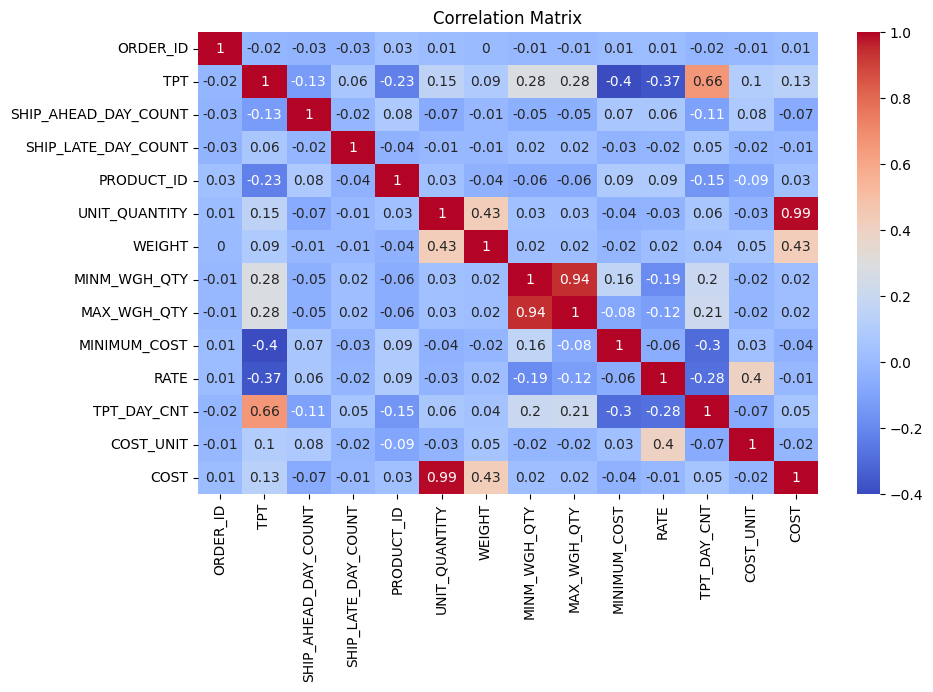

In [ ]:
# plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pricing and Revenue Data
pricing_strategy = df_dict['FreightRates']['MODE_DSC'].unique()
price_elasticity = df_dict['FreightRates']['RATE'].mean()
historical_revenue = df_dict['OrderList']['UNIT_QUANTITY'] * df_dict['OrderList']['COST']
total_revenue = historical_revenue.sum()
print("Pricing strategies:", pricing_strategy)
print("Average price elasticity:", price_elasticity)
print("Total historical revenue:", total_revenue)

Pricing strategies: ['AIR   ' 'GROUND']
Average price elasticity: 2.875135211279718
Total historical revenue: 27855522352652.188


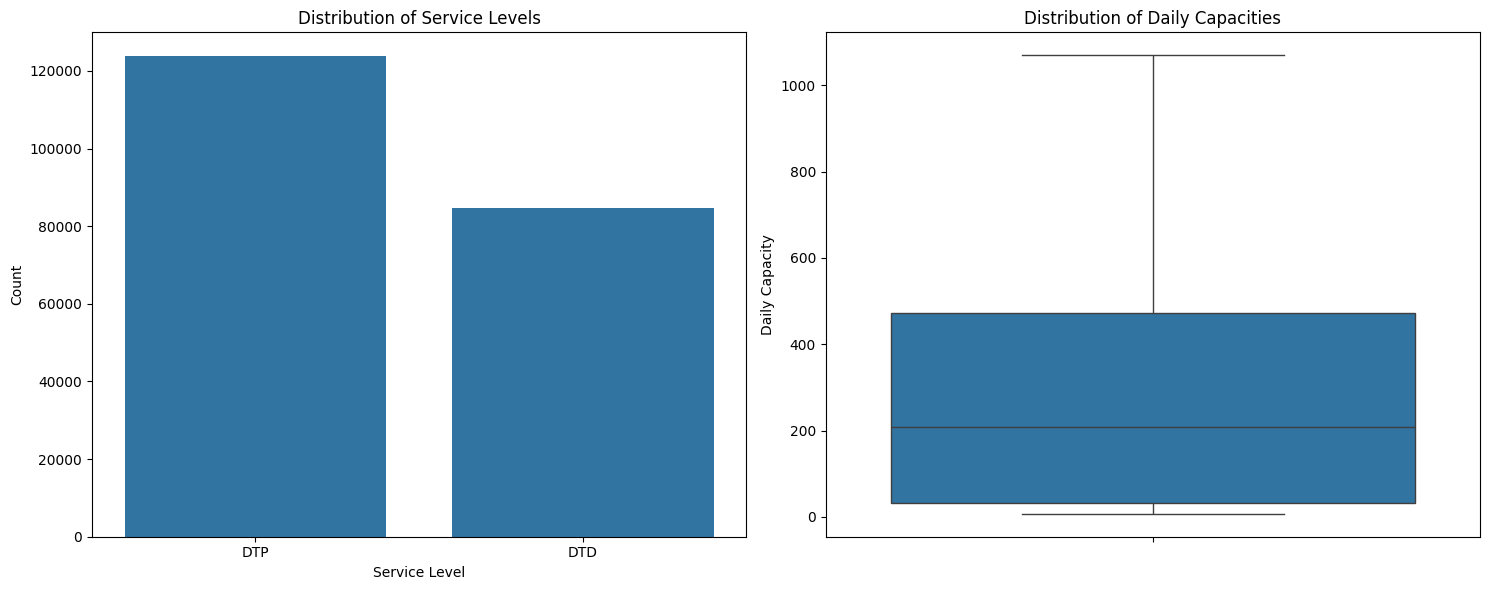

In [ ]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Bar plot of service levels (left subplot)
sns.countplot(data=df_dict['OrderList'], x='SERVICE_LEVEL', ax=axes[0])
axes[0].set_title('Distribution of Service Levels')
axes[0].set_xlabel('Service Level')
axes[0].set_ylabel('Count')

# Box plot of daily capacities (right subplot)
sns.boxplot(data=df_dict['WhCapacities'], y='DAILY_CAPACITY', ax=axes[1])
axes[1].set_title('Distribution of Daily Capacities')
axes[1].set_ylabel('Daily Capacity')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

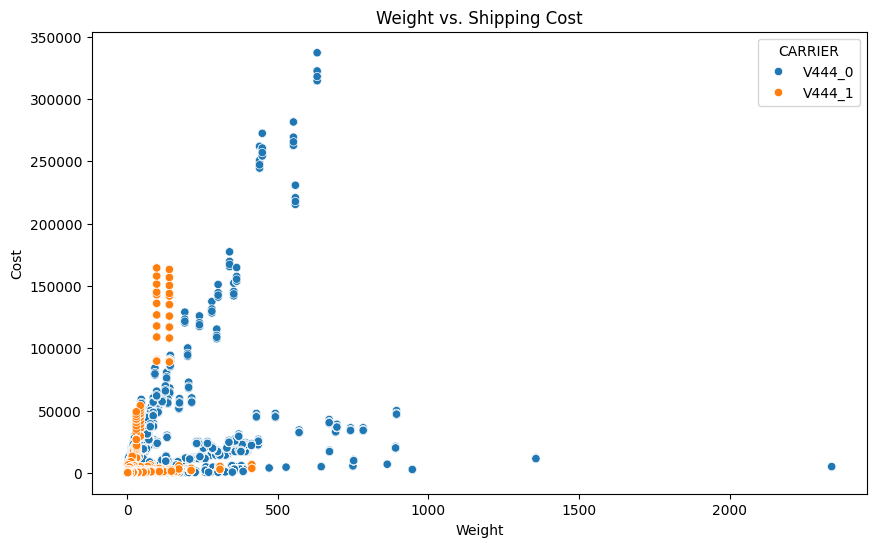

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dict['OrderList'], x='WEIGHT', y='COST', hue='CARRIER')
plt.title('Weight vs. Shipping Cost')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Load the PlantPorts dataframe
df_plant_ports = df_dict['PlantPorts']

# Create the figure
fig = go.Figure()

# Add the connections as traces
for _, row in df_plant_ports.iterrows():
    fig.add_trace(
        go.Scatter(
            x = [row['PLANT_CODE'], row['PORT']],
            y = [1, 0],
            mode = 'lines+markers',
            marker = dict(
                size = 10,
                symbol = 'circle',
                line = dict(
                    color = 'blue',
                    width = 2
                )
            ),
            hoverinfo = 'text',
            text = f"Plant: {row['PLANT_CODE']}<br>Port: {row['PORT']}",
        )
    )

# Set up the layout
fig.update_layout(
    title_text = 'Plant and Port Connections',
    showlegend = False,
    xaxis = dict(
        title = 'PLANT_CODE - PORT',
        tickangle = -45
    ),
    yaxis = dict(
        title = '',
        showticklabels = False,
        range = [-0.2, 1.2]
    )
)

# Show the interactive plot
fig.show()

In [ ]:
# Creates a list of all the supply nodes
supply_nodes = list(df_dict['WhCosts']['WH'])

# Creates a dictionary for the number of units of supply for each supply node
supply_dict = {}
for node in supply_nodes:
    total_capacity = sum(df_dict['WhCapacities']['DAILY_CAPACITY'][df_dict['WhCapacities']['PLANT_ID'] == node])
    supply_dict[node] = total_capacity

# Creates a list of all demand nodes
demand_nodes = list(df_dict['OrderList']['DESTINATION_PORT'].unique())

# Creates a dictionary for the number of units of demand for each demand node
demand_dict = {}
for index, row in df_dict['OrderList'].iterrows():
    dest_port = row['DESTINATION_PORT']
    unit_quantity = row['UNIT_QUANTITY']
    if dest_port in demand_dict:
        demand_dict[dest_port] += unit_quantity
    else:
        demand_dict[dest_port] = unit_quantity

In [ ]:
costs = []
for index, row in df_dict['OrderList'].iterrows():
    carrier = row['CARRIER']
    orig_port = row['ORIG_PORT_CD']
    dest_port = row['DEST_PORT_CD']
    weight = row['WEIGHT']

    matching_rates = df_dict['FreightRates'][(df_dict['FreightRates']['CARRIER'] == carrier) &
                                  (df_dict['FreightRates']['ORIG_PORT_CD'] == orig_port) &
                                  (df_dict['FreightRates']['DEST_PORT_CD'] == dest_port) &
                                  (df_dict['FreightRates']['MINM_WGH_QTY'] <= weight) &
                                  (df_dict['FreightRates']['MAX_WGH_QTY'] >= weight)]['RATE']

    rate = matching_rates.values[0] if not matching_rates.empty else None
    costs.append(rate)

In [ ]:
# Create a dictionary with supply nodes as keys, demand nodes as sub-keys, and costs as values
cost_dict = {}
for supply_node in supply_nodes:
    cost_dict[supply_node] = {}
    for demand_node in demand_nodes:
        cost_dict[supply_node][demand_node] = costs.pop(0)

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 50.7 MB/s eta 0:00:00


In [ ]:
from pulp import *

# Creates the 'prob' variable to contain the problem data
prob = LpProblem("MaterialSupplyProblem", LpMinimize)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in supply_nodes for b in demand_nodes]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (supply_nodes, demand_nodes), 0, None, LpInteger)

# The minimum objective function is added to 'prob' first
prob += lpSum([vars[w][b] * cost_dict[w][b] for (w, b) in Routes]), "Sum_of_Transporting_Costs"

In [ ]:
for w in supply_nodes:
    prob += (
        lpSum([vars[w][b] for b in demand_nodes]) <= supply_dict[w],
        "Sum_of_Products_out_of_warehouses_%s" % w,
    )

In [ ]:
# The demand minimum constraints are added to prob for each demand node (project)
for b in demand_nodes:
    prob += (
        lpSum([vars[w][b] for w in supply_nodes]) >= demand_dict[b],
        "Sum_of_Products_into_projects%s" % b,
    )

In [ ]:
for w in supply_nodes:
    for b in demand_nodes:
        if w != b:  # Check if supply node is different from demand node
            prob += (vars[w][b] >= 0, "No_Self_Transportation_%s_%s" % (w, b))
        else:
            prob += (vars[w][b] == 0, "No_Self_Transportation_%s_%s" % (w, b))
            vars[w][b].lowBound = 0

In [ ]:
prob.solve()

# Print the variables optimized value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Value of Objective Function = ", value(prob.objective))

Route_PLANT01_PORT09 = 1070.0
Route_PLANT02_PORT09 = 138.0
Route_PLANT03_PORT09 = 555600470.0
Route_PLANT04_PORT09 = 554.0
Route_PLANT05_PORT09 = 385.0
Route_PLANT06_PORT09 = 49.0
Route_PLANT07_PORT09 = 265.0
Route_PLANT08_PORT09 = 14.0
Route_PLANT09_PORT09 = 11.0
Route_PLANT10_PORT09 = 118.0
Route_PLANT11_PORT09 = 332.0
Route_PLANT12_PORT09 = 209.0
Route_PLANT13_PORT09 = 490.0
Route_PLANT14_PORT09 = 549.0
Route_PLANT15_PORT09 = 11.0
Route_PLANT16_PORT09 = 457.0
Route_PLANT17_PORT09 = 8.0
Route_PLANT18_PORT09 = 111.0
Route_PLANT19_PORT09 = 7.0
Value of Objective Function =  6821943477.0432


**AHP**

In [ ]:
# Define criteria and alternatives
criteria = ['Cost', 'Distance', 'Time', 'Reliability', 'Environmental Impact']
supply_nodes = list(df_dict['WhCosts']['WH'])
demand_nodes = list(df_dict['OrderList']['DESTINATION_PORT'].unique())
alternatives = supply_nodes + demand_nodes

In [ ]:
# Pairwise comparison matrices (example values, replace with actual judgments)
cost_matrix = np.array([[1, 3, 5, 2],
                        [1/3, 1, 4, 1/2],
                        [1/5, 1/4, 1, 1/3],
                        [1/2, 2, 3, 1]])

distance_matrix = np.array([[1, 1/3, 1/5, 1/2],
                            [3, 1, 1/4, 2],
                            [5, 4, 1, 3],
                            [2, 1/2, 1/3, 1]])

In [ ]:
# Perform eigenvector decomposition to obtain priority vectors
cost_eigenvalues, cost_eigenvectors = np.linalg.eig(cost_matrix)
cost_priority_vector = cost_eigenvectors[:, np.argmax(cost_eigenvalues)]

distance_eigenvalues, distance_eigenvectors = np.linalg.eig(distance_matrix)
distance_priority_vector = distance_eigenvectors[:, np.argmax(distance_eigenvalues)]

# Normalize priority vectors
cost_priority_vector /= np.sum(cost_priority_vector)
distance_priority_vector /= np.sum(distance_priority_vector)


In [ ]:
# Define weights for criteria (example values, replace with actual weights)
weights = {'Cost': 0.3, 'Distance': 0.2, 'Time': 0.2, 'Reliability': 0.15, 'Environmental Impact': 0.15}

In [ ]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("MaterialSupplyProblem", LpMinimize)

In [ ]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in supply_nodes for b in demand_nodes]

In [ ]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (supply_nodes, demand_nodes), 0, None, LpInteger)

In [ ]:
# The minimum objective function is added to 'prob' first
prob += lpSum([vars[w][b] * (weights['Cost'] * cost_priority_vector[min(supply_nodes.index(w), len(cost_priority_vector) - 1)] + weights['Distance'] * distance_priority_vector[min(demand_nodes.index(b), len(distance_priority_vector) - 1)]) for (w, b) in Routes]), "Sum_of_Transporting_Costs"

for w in supply_nodes:
    prob += (
        lpSum([vars[w][b] for b in demand_nodes]) <= sum(df_dict['WhCapacities']['DAILY_CAPACITY'][df_dict['WhCapacities']['PLANT_ID'] == w]),
        "Sum_of_Products_out_of_warehouses_%s" % w,
    )


In [ ]:
# The demand minimum constraints are added to prob for each demand node (project)
for b in demand_nodes:
    prob += (
        lpSum([vars[w][b] for w in supply_nodes]) >= sum(df_dict['OrderList']['UNIT_QUANTITY'][df_dict['OrderList']['DESTINATION_PORT'] == b]),
        "Sum_of_Products_into_projects%s" % b,
    )

In [ ]:
for w in supply_nodes:
    for b in demand_nodes:
        if w != b:  # Check if supply node is different from demand node
            prob += (vars[w][b] >= 0, "No_Self_Transportation_%s_%s" % (w, b))
        else:
            prob += (vars[w][b] == 0, "No_Self_Transportation_%s_%s" % (w, b))
            vars[w][b].lowBound = 0

prob.solve()

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:710: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.10/dist-packages/pulp/mps_lp.py:287: ComplexWarning:

Casting complex values to real discards the imaginary part



-1

In [ ]:
# Print the variables optimized value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_PLANT01_PORT09 = 1070.0
Route_PLANT02_PORT09 = 138.0
Route_PLANT03_PORT09 = 1013.0
Route_PLANT04_PORT09 = 554.0
Route_PLANT05_PORT09 = 385.0
Route_PLANT06_PORT09 = 49.0
Route_PLANT07_PORT09 = 265.0
Route_PLANT08_PORT09 = 14.0
Route_PLANT09_PORT09 = 11.0
Route_PLANT10_PORT09 = 118.0
Route_PLANT11_PORT09 = 332.0
Route_PLANT12_PORT09 = 209.0
Route_PLANT13_PORT09 = 490.0
Route_PLANT14_PORT09 = 549.0
Route_PLANT15_PORT09 = 555599460.0
Route_PLANT16_PORT09 = 457.0
Route_PLANT17_PORT09 = 8.0
Route_PLANT18_PORT09 = 111.0
Route_PLANT19_PORT09 = 7.0


In [ ]:
# The optimised objective function value is printed to the screen
print("Value of Objective Function = ", value(prob.objective))


Value of Objective Function =  (87636011.97488365+0j)
